In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy

In [0]:
def dist(X, Y):
  d = (X**2).sum(axis=1)[np.newaxis].                                                         T - 2 * X.dot(Y.T) + (Y**2).sum(axis=1)[np.newaxis]
  return np.sqrt(d)

def mode(a):
  counts = np.bincount(a)
  return np.argmax(counts)

def efficiency(preds, data_y):
  suma = 0
  for i in range(np.size(preds, 0)):
    if preds[i] == data_y[i]:
      suma+=1
  print(suma/np.size(preds,0)*100, '%')

In [0]:
def knn(train_x, train_y, test_x, k):
  train_y = train_y.astype(np.int32)

  dists = dist(test_x, train_x)
  k_closest = train_y[np.argsort(dists, axis=1)[:, :k]]
  
  return np.apply_along_axis(mode, 1, k_closest)

In [113]:
iris = datasets.load_iris()
'''c = iris.target[5:9]
print(c)
X = iris.data[:5]
Y = iris.data[5:9]
dyst = dist(X, Y)
print(np.shape(dyst))
sort = np.argsort(dyst, axis=1)
print(sort)
print(sort<2)
ans = np.nonzero(sort<2)[1]
get = np.reshape(c[ans], (5,2))
print(get)
mode(get[0])
print('a, ',np.apply_along_axis(mode, axis=1, arr=get))'''

g = iris.data[:5]
p = np.array([1, 1, 2, 2, 1])
d = iris.data[5:9]
print(knn(g, p, d, 3))

[1 2 1 2]


92.0 %


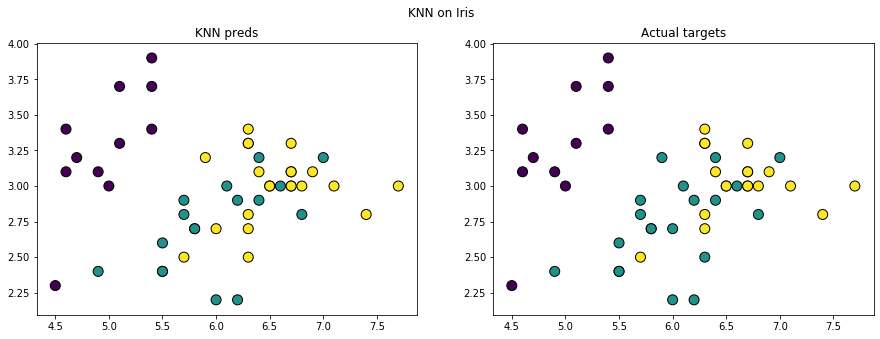

In [114]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df['target'] = iris.target

train, test = train_test_split(iris_df, test_size=0.3333)

train_iris_x = np.array(train.drop('target', axis=1))
train_iris_y = np.array(train['target'])

test_iris_x = np.array(test.drop('target', axis=1))
test_iris_y = np.array(test['target'])

preds = knn(train_iris_x, train_iris_y, test_iris_x, 15)
efficiency(test_iris_y.astype(np.int32), preds)

fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle('KNN on Iris')

axes[0].set_title('KNN preds')
axes[1].set_title('Actual targets')

axes[0].scatter(test_iris_x[:, 0], test_iris_x[:, 1], s=100,
                c=preds, edgecolors='black')

axes[1].scatter(test_iris_x[:, 0], test_iris_x[:, 1], s=100,
                c=test_iris_y, edgecolors='black')

In [115]:
train_digits = np.array(pd.read_csv('optdigits.tra', header=None))
test_digits = np.array(pd.read_csv('optdigits.tes', header=None))

X_train = train_digits[:,:-1]
Y_train = train_digits[:,-1]
X_test = test_digits[:,:-1]
Y_test= test_digits[:,-1]

preds = knn(X_train, Y_train, X_test, 5)
efficiency(preds, Y_test)

'''fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle('KNN on digits')

axes[0].set_title('KNN preds')
axes[1].set_title('Actual targets')

axes[0].scatter(X_test[:, 0], X_test[:, 1], s=100,
                c=preds, edgecolors='black')

axes[1].scatter(X_test[:, 0], X_test[:, 1], s=100,
                c=Y_test, edgecolors='black')'''

97.88536449638286 %


"fig, axes = plt.subplots(1,2)\nfig.set_size_inches(15,5)\nfig.suptitle('KNN on digits')\n\naxes[0].set_title('KNN preds')\naxes[1].set_title('Actual targets')\n\naxes[0].scatter(X_test[:, 0], X_test[:, 1], s=100,\n                c=preds, edgecolors='black')\n\naxes[1].scatter(X_test[:, 0], X_test[:, 1], s=100,\n                c=Y_test, edgecolors='black')"

In [116]:
X = np.array([1, 2, 2, 3])
Y = np.array([0, 3, 2, 2])
print(np.count_nonzero(X!=Y))

3


In [134]:
def cross(X, Y, slices):
  err = 0
  indices = np.random.uniform(0, slices, len(X)).astype(int)

  for i in range(slices):
    train_x = X[indices != i]
    train_y = Y[indices != i]
    test_x = X[indices == i]
    test_y = X[indices == i]
    preds = knn(train_x, train_y, test_x, 3)
    err += np.count_nonzero(preds!=test_y)

  return err


print(cross(train_iris_x, train_iris_y, 10))
print(cross(X_train, Y_train, 10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


10
10


**ZADANIE 3**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets, metrics, tree

In [119]:
random_forest = RandomForestClassifier(n_estimators=20)
extra_random_forest = ExtraTreesClassifier(n_estimators=20)

random_forest.fit(train_iris_x, train_iris_y)
extra_random_forest.fit(train_iris_x, train_iris_y)

print('Random Forest:')
print(metrics.confusion_matrix(random_forest.predict(test_iris_x), test_iris_y))

Random Forest:
[[11  0  0]
 [ 0 19  0]
 [ 0  3 17]]


In [120]:
print('Extremely Randomized Trees:')
print(metrics.confusion_matrix(extra_random_forest.predict(test_iris_x), test_iris_y))

Extremely Randomized Trees:
[[11  0  0]
 [ 0 18  0]
 [ 0  4 17]]


 **titanic:**

In [121]:
titanic = pd.read_csv("titanic_train.csv")
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
titanic = titanic.dropna()
titanic['Sex'] = pd.Categorical(titanic['Sex']).codes
titanic['Embarked'] = pd.Categorical(titanic['Embarked']).codes
titanic.head()

titanic_train, titanic_test = train_test_split(titanic, test_size=0.3333)

titanic_train_x = titanic_train.drop('Survived', axis = 1)
titanic_train_y = titanic_train['Survived']

titanic_test_x = titanic_test.drop('Survived', axis = 1)
titanic_test_y = titanic_test['Survived']

random_forest = RandomForestClassifier(n_estimators=20)
extra_random_forest = ExtraTreesClassifier(n_estimators=20)

random_forest.fit(titanic_train_x, titanic_train_y)
extra_random_forest.fit(titanic_train_x, titanic_train_y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [122]:
print('Random Forest:')
print(metrics.confusion_matrix(random_forest.predict(titanic_test_x), titanic_test_y))

Random Forest:
[[123  30]
 [ 20  65]]


In [123]:
print('Extremely Randomized Trees:')
print(metrics.confusion_matrix(extra_random_forest.predict(titanic_test_x), titanic_test_y))

Extremely Randomized Trees:
[[119  27]
 [ 24  68]]
